<a href="https://colab.research.google.com/github/tccundari/FIAP15IA-VisaoComputacional/blob/main/Trabalho_de_analise_imagens_medicas_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Turma 15IA - Grupo 3 - ThreeRocks 

INTEGRANTES
1. André Ricardo Koeppl RM 337234
2. Claudio Baraza RM 337620
3. Tiago Cundari RM 339135
4. Marcus Vinicius Galdino RM 338429

# MBA FIAP Inteligência Artificial & Machine Learning

## Visão Computacional: Análise de Imagens Médicas

> Atenção: este notebook foi desenhado para funcionar no **Google Collab**. Se pretende executar localmente prefira a versão local deste notebook, sem o sufixo ```-collab```.


## 1. Introdução

As tecnologias de imagens médicas estão cada vez mais integradas aos sitemas de visão computacional, incluindo as imagens de raio-x.

Modelos de equipamentos modernos geram imagens digitais deste tipo de exame, proporcionando análises mais completas e menos _ad-hoc_, com isso algumas pré-análises podem ser realizadas por aplicações baseadas em inteligência artificial para confirmar ou sugerir diagnósticos ao profissional responsável pelo exame.

No campo dos diagósticos por raios-x, a pnenumonia é uma das enfermidades onde seu uso é um dos mais aplicados para determinar o curso de tratamento.

<p align="center">
    <img src="https://github.com/michelpf/fiap-ml-visao-computacional-capstone-alternative/blob/master/projeto-final/imagens/NORMAL2-IM-1422-0001.jpeg?raw=1">
</p>

## 2. Instruções

Este projeto final tem como objetivo explorar os conhecimentos adquiridos nas aulas práticas.

Por meio de uma trilha guiada, iremos constuir um modelo que seja capaz de classificar imagens de raio-x para determinar se a determinada pessoa está com alguma condição que necessita maiores cuidados.

De acordo com as imagens disponíveis para o treinamento e validação, será de critério do grupo selecionar as quantidades ideais ou até mesmo pré-processar as imagens para obter o melhor resultado, nos principais indicadores de performance, como precisão, sensibilidade e pontuação F1.

Este projeto poderá ser feita por grupos de até 4 pessoas.
Caso este projeto seja substitutivo, deverá ser realizado por apenas uma pessoa.

| Nome dos Integrantes     | RM            | Turma   |
| :----------------------- | :------------ | :-----: |
| André Ricardo Koeppl     | RM 337234     | `15IA`  |
| Claudio Baraza           | RM 337620     | `15IA`  |
| Tiago Cundari            | RM 339135     | `15IA`  |
| Marcus Vinicius Galdino  | RM 338429     | `15IA`  |

Por ser um projeto guiado, fique atento quando houver as marcações **Implementação** indica que é necessário realizar alguma implementação em Python no bloco a seguir onde há a inscrição ```##IMPLEMENTAR``` e **Resposta** indica que é esperado uma resposta objetiva relacionado a algum questionamento. 

**Cada grupo pode utilizar nas respostas objetivas quaisquer itens necessários que enriqueçam seu ponto vista, como gráficos, fotos e, até mesmo, trechos de código-fonte.**

Pode-se utilizar quantos blocos forem necessários para realizar determinadas implementações ou utilizá-las para justificar as respostas. Não é obrigatório utilizar somente o bloco indicado.

Ao final não se esqueça de subir os arquivos do projeto nas contas do GitHub de cada membro, ou subir na do representante do grupo e os membros realizarem o fork do projeto.

A avaliação terá mais ênfase nos seguintes tópicos de desenvolvimento do projeto:
 
1. __Pré-Processamento__
2. __Classificação__
3. __Performance__
4. __Conclusões Finais__

## 3.1 Detalhe do problema: a pneunomia

Fonte: [artigo](https://drauziovarella.uol.com.br/doencas-e-sintomas/pneumonia) do Dr. Drauzio Varella.

Pneumonias são infecções que se instalam nos pulmões, órgãos duplos localizados um de cada lado da caixa torácica. Podem acometer a região dos alvéolos pulmonares onde desembocam as ramificações terminais dos brônquios e, às vezes, os interstícios (espaço entre um alvéolo e outro).

Basicamente, pneumonia é provocada pela penetração de um agente infeccioso ou irritante (bactérias, vírus, fungos e por reações alérgicas) no espaço alveolar, onde ocorre a troca gasosa. Esse local deve estar sempre muito limpo, livre de substâncias que possam impedir o contato do ar com o sangue.

Exame clínico, auscultação dos pulmões e radiografias de tórax são recursos essenciais para o diagnóstico de pneumonia.

<p align="center">
    <img src="https://github.com/michelpf/fiap-ml-visao-computacional-capstone-alternative/blob/master/projeto-final/imagens/pneumonia.jpeg?raw=1">
</p>

## 3.2 Diagnóstico por raio-x

O exame de raio-x traz diferenças em cada tipo de diagnóstico, sendo considerado os seguintes grupos de análise: **normal** (ou controle) onde não há nenhuma condição de infeção, **bacterial pneumonia** (pneumonia bacteriana) que representa a condição de infecção bacteriana e **viral pneumonia** que indica a condição de infecção vira. 

<p align="center">
<img src="https://github.com/michelpf/fiap-ml-visao-computacional-capstone-alternative/blob/master/projeto-final/imagens/raiox.png?raw=1" height="60%" width="60%">
</p>

As imagens de controle não são mais brancas ao centro que é onde fica o coração. Já nas imagens com pneumonia é possível notar regiões brancas ao redor dos pulmões, que é como o exame identifica as secreções responsáveis pela infeçcão.

Quando mais regiões brancas ao redor do pulmão mais severa é a inflamação e menos se observa dos detalhes dos pulmões, ficando um pouco esmaecido diante desta condição.

## 4.1 Problema

Construir um classificador utilizando _transfer learning_ para identificar as seguintes classes: **controle**, **pneumonia bacteriana** e **pneumonia viral**.

Para construir este classificador, utilize o dataset do [Kaggle Chest Ray Pneumonia](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia) e organize os dados de forma a separar em cada uma das classes que já estão definidas no diretório ```raiox```, sendo ```controle``` para as imagens normais (sem inflamação), ```bacteria``` para as imagens de pneumonia bacteriana e ```viral``` para as imagens de pneumonia viral.

Determine a quantidade de imagens a serem treinadas e validadas. Utiliza pelo menos, 100 imagens para cada classe.

Compare os resultados com pelo menos 3 classificadores, obtendo os valores de **precisão (precision)**, **sensibilidade (recall)** e **pontuação F1 (F1 Score)**. No guia abaixo, foi indicado os seguintes modelos: ResNet50, VGG16 e VGG19. 

>Importante: a escolha do número de imagens devem ser o suficiente para alcançar o valor de **precisão** mínima de 70%.
Note que as imagens de pneumonia bacteria e viral estão misturadas dentro da pasta ```PNEUMONIA```. É necessário separar as imagens manualmente tendo como base o sufixo. As imagens que terminal com ```_virus``` se referem a pneumoria viral e as que terminam com ```_bacteria``` se referem a pneumonia bacteriana.

A construção do modelo será utilizada o framework Keras.

**Pergunta**: Qual o número de imagens que foram selecionadas para cada classe?

In [ ]:
#Criando os diretórios para separar as imagens
import os.path
from os import path

if path.exists('/content/raiox') == False:
  os.mkdir('/content/raiox')
  os.mkdir('/content/raiox/normal')
  os.mkdir('/content/raiox/pneumonia_bacteriana')
  os.mkdir('/content/raiox/pneumonia_viral')

In [ ]:
from scipy import ndimage, misc
import numpy as np
import os
import shutil
import cv2

path = "/content/drive/MyDrive/MBA - Fiap 15A/Visão Computacional/chest_xray/train/NORMAL"
out = "/content/raiox/normal"
contador = 0

# processo de leitura e separação das imagens de controle
for image_path in os.listdir(path):

  if(".jpeg" in image_path):
    input_path = os.path.join(path, image_path)
    output_path = os.path.join(out, image_path)

    shutil.copy(input_path, output_path)
    contador = contador+1

print("Quantidade de radiograficas de controle: {}".format(contador))

Quantidade de radiograficas de controle: 1341


In [ ]:
from scipy import ndimage, misc
import numpy as np
import os
import shutil
import cv2

path = "/content/drive/MyDrive/MBA - Fiap 15A/Visão Computacional/chest_xray/train/PNEUMONIA"
out_bac = "/content/raiox/pneumonia_bacteriana"
out_vir = "/content/raiox/pneumonia_viral"
contador_bac = 0
contador_vir = 0

# processo de leitura e separação das imagens bacterianas e virais
for image_path in os.listdir(path):

  if(".jpeg" in image_path):
    input_path = os.path.join(path, image_path)
    if("bacteria" in image_path):
      output_path = os.path.join(out_bac, image_path)
      contador_bac = contador_bac+1

    if("virus" in image_path):
      output_path = os.path.join(out_vir, image_path)
      contador_vir = contador_vir+1

    shutil.copy(input_path, output_path)

print("Quantidade de radiograficas bateriana: {}".format(contador_bac))
print("Quantidade de radiograficas viral: {}".format(contador_vir))

Quantidade de radiograficas bateriana: 2530
Quantidade de radiograficas viral: 1345


In [ ]:
#Limpando os arquivos de chackpoints do colab (as vezes o colab cria este arquivo)
rm -rf 'find -type d -name .ipynb_checkpoints'

**Resposta**:
Quantidade de radiograficas de controle: 1342

Quantidade de radiograficas bateriana: 2530

Quantidade de radiograficas viral: 1345

## 4.2 Componentes obrigatórios

Todas as bibliotecas já estão instaladas no Google Colab.

* Keras
* Tensorflow
* Pillow
* Matplotlib

In [ ]:
import os

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline

from tensorflow.keras.models import Sequential, load_model, model_from_json
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50, VGG19
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras import Model, layers
from tensorflow.keras import optimizers

import tensorflow.keras.backend as K

## 4.3 Carregando imagens de treinamento e validação

Selecione a melhor divisão entre dados de treinamento e validação. O número deverá ser representado em número fracionário, 5% equivale a 0.05, por exemplo.

> Você pode _montar_ o drive do Google Drive se precisar e quiser armazenar as imagens nesta plataforma. Como o Colab é efêmero, se você copiar os arquivos para o ambiente eles serão apagados depois do fim da sessão. Acesse [esta](https://medium.com/@maxwellcsm/colaboratory-acessando-os-arquivos-do-google-drive-d08ef9157dbf) referência para saber mais como o recurso funciona, inclusive recomenda-se essa abordagem de montar o próprio Google Drive.

Se não for utilizar o Google Drive, crie as pastas que serão utilizadas para armazenar as imagens.

### 4.3.1 Utilizando Google Drive

Se usar o Google Drive para armazenar as imagens utilize o comando abaixo para montar seu drive.
Você pode navegar pelas pastas pelo painel ao lado.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 4.3.2 Utilizando o armazenamento efêmero

Se optar pelo armazenamento efêmero você precisa enviar os arquivos de imagens (arrastar e soltar) para as pastas que deverão ser criadas pelo comando a seguir.

In [ ]:
!mkdir raiox/
!mkdir raiox/normal
!mkdir raiox/pneumonia_bacteriana
!mkdir raiox/pneumonia_viral

Defina o nome da pasta onde contém as sub-pastas referente aos 3 tipos de classe. Se optar pelo armazenamento efêmero a pasta será ```raiox```. Se optar pelo Goolge Drive, indique o caminho da pasta.

In [ ]:
## IMPLEMENTE
divisao_treino_validacao = 0.75
nome_pasta_raiz_imagens = "/content/raiox"

O caminho abaixo da pasta ```raiox``` pode ser alterado caso você opte por utilizar uma pasta específica do seu Google Drive. Neste caso, certifique que dentro delas tem as sub-pastas referentes as imagens normal, pneumonia bacteriana e viral.

In [ ]:
train_datagen = ImageDataGenerator(validation_split=divisao_treino_validacao)

train_generator = train_datagen.flow_from_directory(
    nome_pasta_raiz_imagens,
    batch_size=32,
    class_mode="categorical",
    color_mode="rgb",
    target_size=(224,224),
    subset="training")

Found 1306 images belonging to 3 classes.


In [ ]:
val_generator = train_datagen.flow_from_directory(
    nome_pasta_raiz_imagens,
    batch_size=32,
    class_mode="categorical",
    color_mode="rgb",
    target_size=(224,224),
    subset="validation")

Found 3910 images belonging to 3 classes.


In [ ]:
train_generator.class_indices, val_generator.class_indices

({'normal': 0, 'pneumonia_bacteriana': 1, 'pneumonia_viral': 2},
 {'normal': 0, 'pneumonia_bacteriana': 1, 'pneumonia_viral': 2})

## 4.4 Modelos de transfer learning

O Keras já possui classes especializadas para os seguintes modelos de deep-learning treinados com o conjunto de dados [ImageNet](http://www.image-net.org/):
  
* Xception
* VGG16
* VGG19
* ResNet50
* InceptionV3
* InceptionResNetV2
* MobileNet
* DenseNet
* NASNet
* MobileNetV2

Mais detalhes, veja na [documentação do Keras](https://keras.io/applications/).

Para este estudo, vamos utilizar para avaliação as seguintes arquiteturas: RestNet50, VGG15 e VGG19.

## 4.5 Indicadores de desempenho

O Keras não possui os indicadores de desempenho como precisão, sensibilidade e pontuação f1 por padrão, portanto precisamos implementar externamente.

In [ ]:
def recall_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

### 4.5.1 Arquitetura ResNet50

**Pergunta**: Explique como é constituída a arquitetura do ResNet50? *Utilize, se necessário, gráficos, projetos que utilizam essa arquitetura. Detalhe também sua topologia em camadas e mostre quais as situações essa arquitetura pode ter mais êxito e quais cenários não tem.*

**Resposta**: A arquitetura do Resnet possibilita treinar redes neurais extremamente profundas, com até mais de 150 camadas (no caso do Resnet50 são 50 camadas), o problema de treinar modelos tão profundos é a degradasção, isto é conforme a rede vai ficando mais profunda seu desempenho vai ficando saturado por conta do gradiente que fica cada vez menor. A Resnet lida com este problema com a implementação uma espécie de "atalho" (SKIP CONNECTIONS) que fazem fluir informações das camadas anteriores para as camadas posteriores.

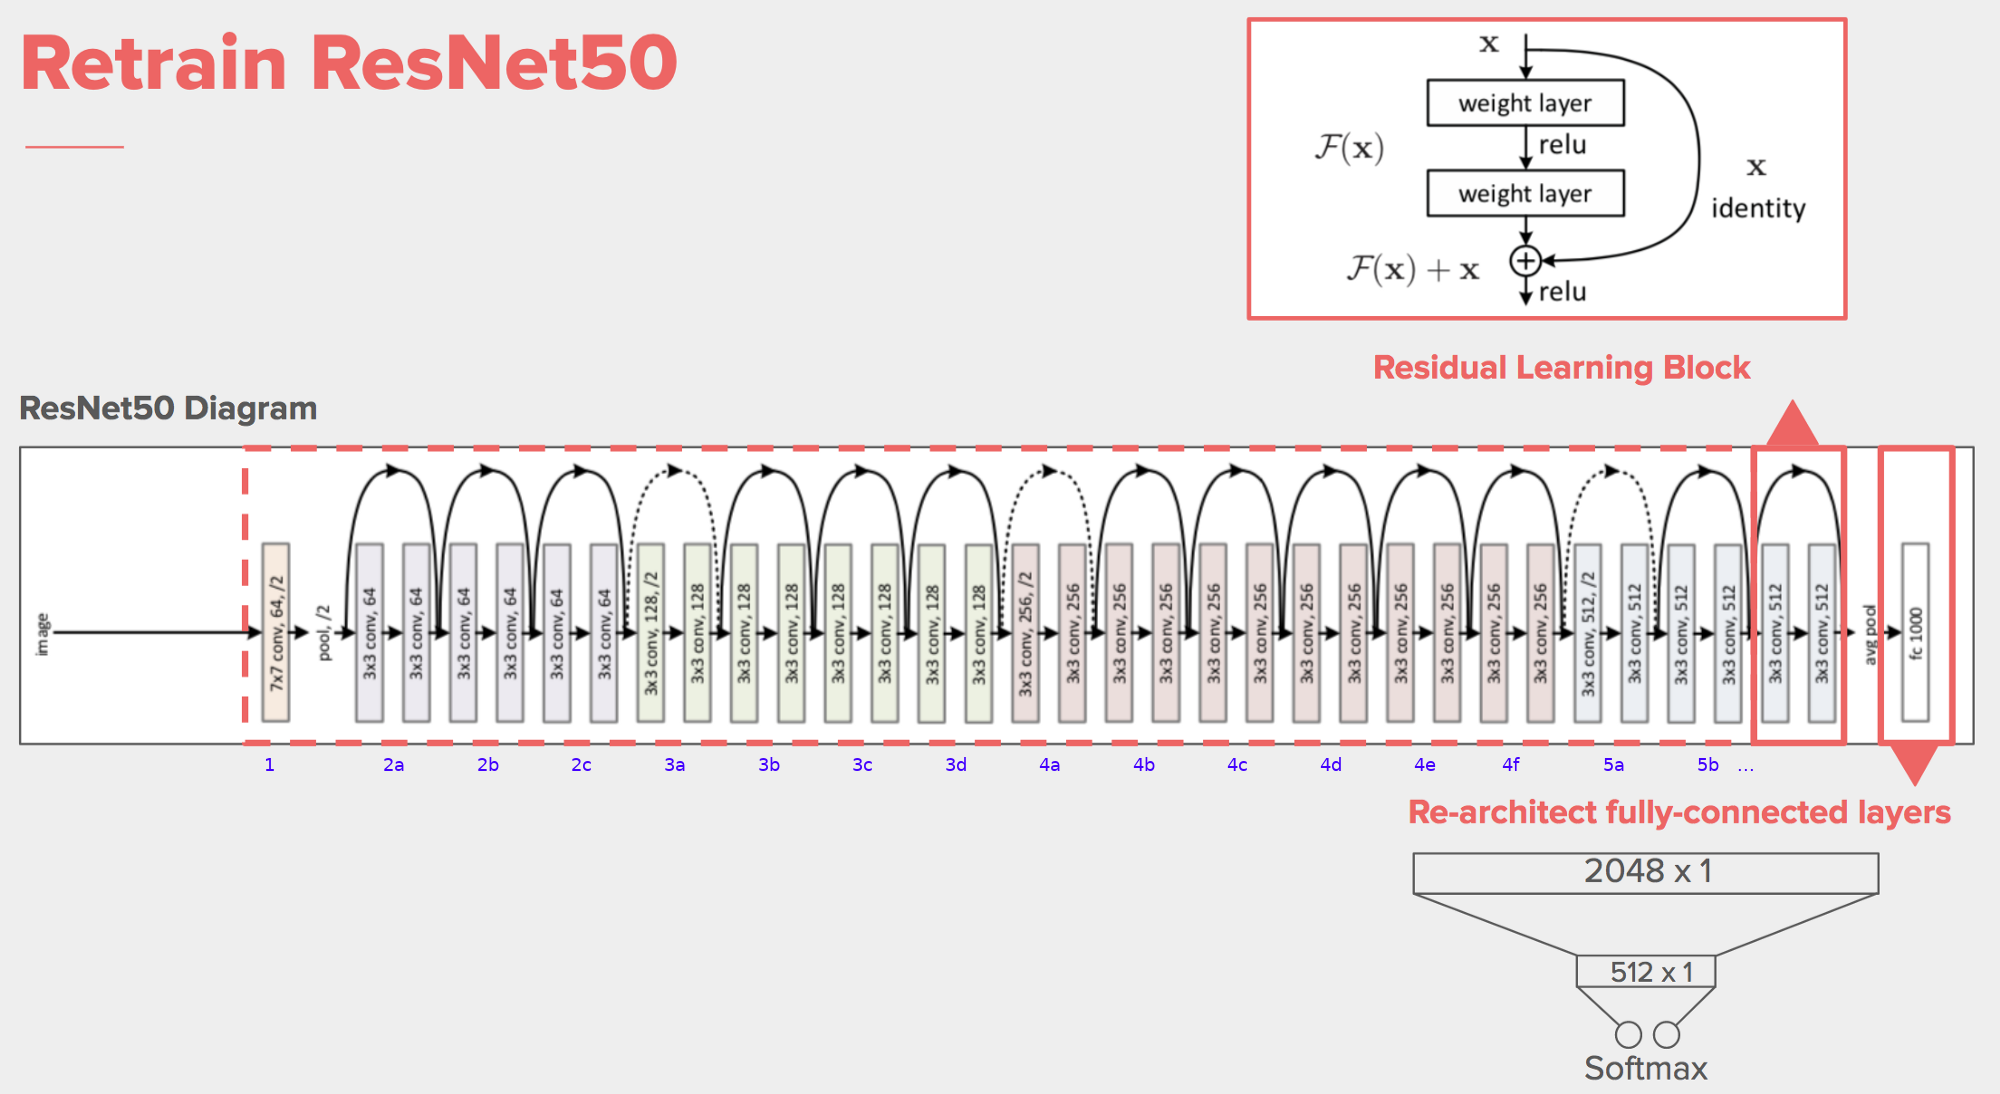


A técnica de transfer learning consiste de utilizar o mesmo modelo e treiná-lo para outas imagens. Por tal motivo, excluímos a última camada para modelar com as classes que definimos, ou seja, **controle**, **bacteriana** e **viral**.

Informe a quantidade de classes a serem classificadas.

In [ ]:
## IMPLEMENTE

qtde_classes = 3

In [ ]:
conv_base = ResNet50(include_top=False)

for layer in conv_base.layers:
    layer.trainable = False

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 

predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
optimizer = optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

O número de épocas define quantas vezes o modelo irá treinar e validar o erro, assim ajustando os pesos para melhor convergência.
Escolha o número adequado de épocas para alcançarmos pelo menos **70% de precisão de validação**.

In [ ]:
## IMPLEMENTE
qtde_epocas = 8

In [ ]:
history = model.fit(train_generator, epochs=qtde_epocas, validation_steps=5, steps_per_epoch=5, 
                    validation_data=val_generator)

Epoch 1/8
5/5 [==============================] - 67s 14s/step - loss: 2.5196 - precision_score: 0.3494 - recall_score: 0.3434 - f1_score: 0.3463 - val_loss: 1.0331 - val_precision_score: 0.6807 - val_recall_score: 0.5938 - val_f1_score: 0.6338
Epoch 2/8
5/5 [==============================] - 57s 13s/step - loss: 1.0037 - precision_score: 0.5563 - recall_score: 0.4839 - f1_score: 0.5169 - val_loss: 0.8799 - val_precision_score: 0.6066 - val_recall_score: 0.5188 - val_f1_score: 0.5589
Epoch 3/8
5/5 [==============================] - 58s 13s/step - loss: 0.8461 - precision_score: 0.6175 - recall_score: 0.5305 - f1_score: 0.5706 - val_loss: 0.8987 - val_precision_score: 0.6698 - val_recall_score: 0.6062 - val_f1_score: 0.6363
Epoch 4/8
5/5 [==============================] - 57s 13s/step - loss: 0.6778 - precision_score: 0.7460 - recall_score: 0.6362 - f1_score: 0.6858 - val_loss: 0.7815 - val_precision_score: 0.6926 - val_recall_score: 0.6375 - val_f1_score: 0.6639
Epoch 5/8
5/5 [=========

Um modelo que converge bem possui o gráfico de perda (*loss*) descendente e os gráfico de precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*) em acendente.

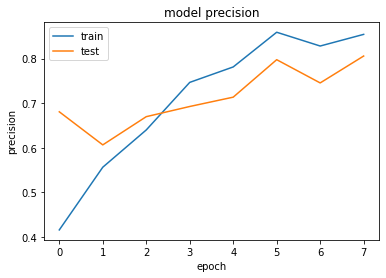

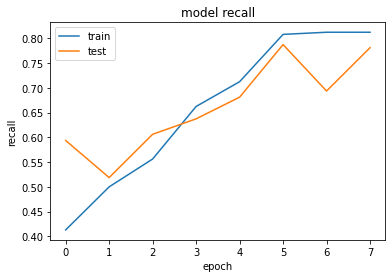

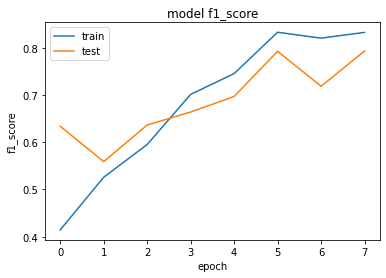

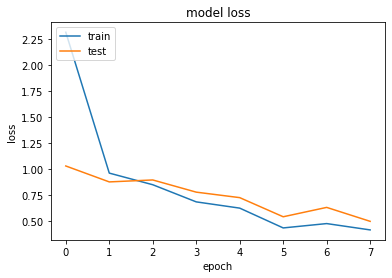

In [ ]:
# Exibindo dados de Precisão
plt.plot(history.history['precision_score'])
plt.plot(history.history['val_precision_score'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Sensibilidade
plt.plot(history.history['recall_score'])
plt.plot(history.history['val_recall_score'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de F1 Score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Pergunta**: Avalie os gráficos de perda (*loss*), precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*)  e explique o comportamento de ambos no que tange a convergência do modelo.

**Resposta**: o modelo apresentou uma boa convergência a partir da quinta época para precisão, sensibilidade e pontuação apresentando uma certa estabilidade por volta de 0.8, no que diz respeito a perda o modelo convergiu bem a partir da primeira época e continou caindo até a sétima época o que indica o quão perto a predição do modelo está do valor verdadeiro.
Podemos dizer que o modelo convergiu bem pois os gráficos de precisão, sensibilidade e Pontuação apresentam uma curva acendente e o gráfico de loss apresenta uma curva descentente.


**Pergunta**: Quais são os valores de **precisão (precision)**, **sensibilidade (recall)** de validação? 

*Estes valores são exibidos durante o treinamento, utilize a última saída, exemplo:*

```
Epoch 10/10 [==============================] - 45s 9s/step - loss: 0.1234 - precision_score: 0.9742 - recall_score: 0.9683 - f1_score: 0.9712 - val_loss: 0.8819 - val_precision_score: 0.6912 - val_recall_score: 0.5649 - val_f1_score: 0.6216```

No caso acima, o valor de precisão, sensibilidade e pontuação de validação são, respectivamente, 69,12%, 56,49% e 62,16%.

**Resposta**:
Precisão: 80,58% Sensibilidade: 78,12% Pontuação de Validação: 79,31%

### 4.5.2 Arquitetura VGG16

**Pergunta**: Explique como é constituída a arquitetura do VGG16? *Utilize, se necessário, gráficos, projetos que utilizam essa arquitetura. Detalhe também sua topologia em camadas e mostre quais as situações essa arquitetura pode ter mais êxito e quais cenários não tem.*

**Resposta**:A principal característica da VGG16 é que em vez de ter um grande número de hiperparâmetros (que são os dados que controlam o próprio processo de treinamento), eles se concentraram em ter camadas de convolução de filtro 3x3 e camada maxpool de filtro 2x2 e no final tem 2 camadas totalmente conectadas seguidos por um softmax para a saída. O 16 no VGG16 refere-se a 16 camadas. O VGG16 pode ser considerada uma rede grande por ter aproximadamente 138 milhões de parâmetros.

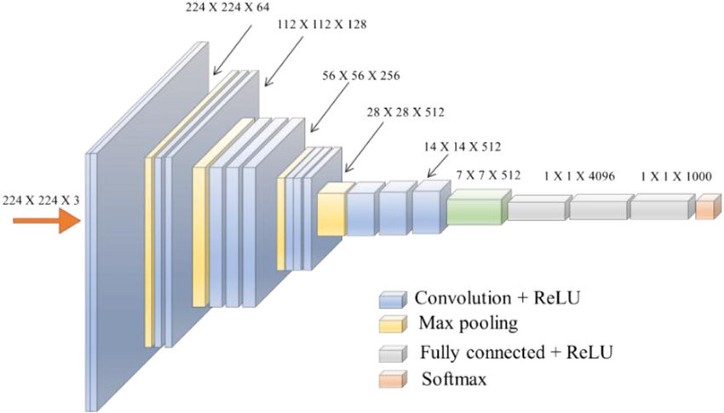

In [ ]:
conv_base = VGG16(include_top=False)

for layer in conv_base.layers:
    layer.trainable = False

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 

predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0   

In [ ]:
## IMPLEMENTE
qtde_epocas = 10

In [ ]:
optimizer = optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

In [ ]:
history = model.fit(train_generator, epochs=qtde_epocas, validation_steps=5, steps_per_epoch=5, 
                    validation_data=val_generator)

Epoch 1/10
5/5 [==============================] - 165s 37s/step - loss: 0.7655 - precision_score: 0.7796 - recall_score: 0.7724 - f1_score: 0.7759 - val_loss: 1.5452 - val_precision_score: 0.6521 - val_recall_score: 0.6375 - val_f1_score: 0.6446
Epoch 2/10
5/5 [==============================] - 164s 37s/step - loss: 0.9352 - precision_score: 0.6999 - recall_score: 0.6727 - f1_score: 0.6859 - val_loss: 0.9804 - val_precision_score: 0.6953 - val_recall_score: 0.6812 - val_f1_score: 0.6881
Epoch 3/10
5/5 [==============================] - 163s 37s/step - loss: 0.5446 - precision_score: 0.8423 - recall_score: 0.8397 - f1_score: 0.8410 - val_loss: 1.3093 - val_precision_score: 0.6411 - val_recall_score: 0.6375 - val_f1_score: 0.6393
Epoch 4/10
5/5 [==============================] - 163s 37s/step - loss: 0.5416 - precision_score: 0.8095 - recall_score: 0.8095 - f1_score: 0.8095 - val_loss: 1.0559 - val_precision_score: 0.6968 - val_recall_score: 0.6875 - val_f1_score: 0.6921
Epoch 5/10
5/5 [

Um modelo que converge bem possui o gráfico de perda (*loss*) descendente e os gráfico de precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*) em acendente.

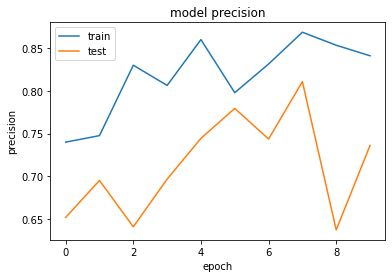

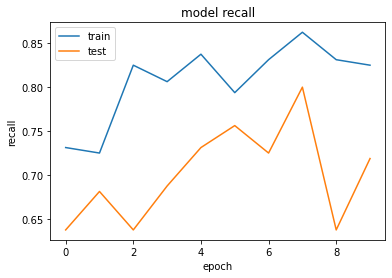

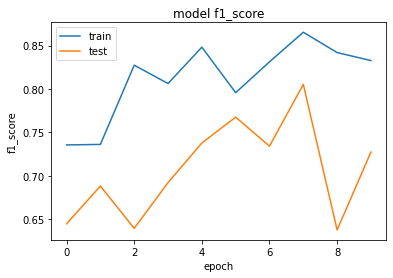

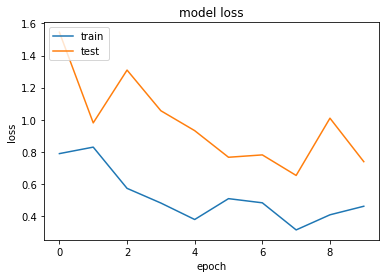

In [ ]:
# Exibindo dados de Precisão
plt.plot(history.history['precision_score'])
plt.plot(history.history['val_precision_score'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Sensibilidade
plt.plot(history.history['recall_score'])
plt.plot(history.history['val_recall_score'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de F1 Score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Pergunta**: Avalie os gráficos de perda (*loss*), precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*)  e explique o comportamento de ambos no que tange a convergência do modelo.

**Resposta**: Observa-se que as épocas já começaram apresentando valores altos (por volta de 0.65) e que conforme avançou pouas épocas já alcançou o valor alvo de precição acima de 0.7 por volta da quinta época. A variação dos valores foi baixa ficando entre 0.63 a 0.8 no scoring. Quanto a perda (loss) observa-se que o treino apresentou o valor de 1.5 na primeira época e caiu para menos da metade em 0.7 o que indica o quanto o modelo melhorou sua predição.
Podemos dizer que o modelo teve uma converência modesta, pois ainda que pequena a variação a convergencia para precisão, sensibilidade e potuação foi levemente acendente e a perda, de forma também modesta, apresenta uma curva descendente.

**Pergunta**: Quais são os valores de **precisão (precision)**, **sensibilidade (recall)** de validação? 

*Estes valores são exibidos durante o treinamento, utilize a última saída, exemplo:*

```
Epoch 10/10 [==============================] - 45s 9s/step - loss: 0.1234 - precision_score: 0.9742 - recall_score: 0.9683 - f1_score: 0.9712 - val_loss: 0.8819 - val_precision_score: 0.6912 - val_recall_score: 0.5649 - val_f1_score: 0.6216```

No caso acima, o valor de precisão, sensibilidade e pontuação de validação são, respectivamente, 69,12%, 56,49% e 62,16%.

**Resposta**:
Precisão: 73,61% Sensibilidade: 71,88% Pontuação de Validação: 72,72%


### 4.5.3 Arquitetura VGG19

**Pergunta**: Explique como é constituída a arquitetura do VGG19? *Utilize, se necessário, gráficos, projetos que utilizam essa arquitetura. Detalhe também sua topologia em camadas e mostre quais as situações essa arquitetura pode ter mais êxito e quais cenários não tem.*

**Resposta**:O VGG19 segue a mesma arquitetura do VGG19 com a diferença da adição de mais 3 camadas de convolução extras antes de cada um dos ultimos três max poolings. O número 19 do VGG19 faz menção das 19 camadas.

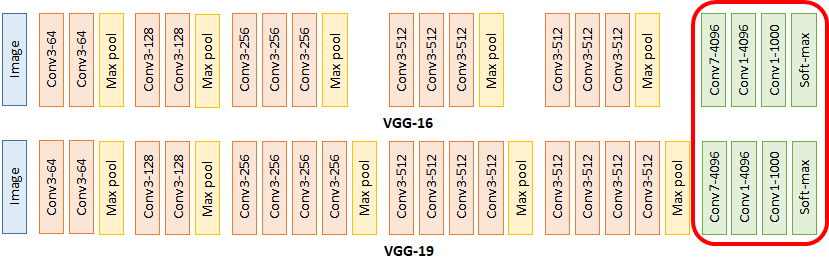

In [ ]:
conv_base = VGG19(include_top=False)

for layer in conv_base.layers:
    layer.trainable = False

80142336/80134624 [==============================] - 1s 0us/step


In [ ]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 

predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0   

In [ ]:
optimizer = optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

In [ ]:
history = model.fit(train_generator, epochs=qtde_epocas, validation_steps=5, steps_per_epoch=5, 
                    validation_data=val_generator)

Epoch 1/10
5/5 [==============================] - 211s 46s/step - loss: 2.8145 - precision_score: 0.3450 - recall_score: 0.3396 - f1_score: 0.3422 - val_loss: 1.3541 - val_precision_score: 0.5357 - val_recall_score: 0.5188 - val_f1_score: 0.5269
Epoch 2/10
5/5 [==============================] - 204s 46s/step - loss: 1.2682 - precision_score: 0.5915 - recall_score: 0.5432 - f1_score: 0.5660 - val_loss: 1.1266 - val_precision_score: 0.6824 - val_recall_score: 0.6562 - val_f1_score: 0.6690
Epoch 3/10
5/5 [==============================] - 205s 46s/step - loss: 0.8148 - precision_score: 0.6770 - recall_score: 0.6477 - f1_score: 0.6620 - val_loss: 1.1812 - val_precision_score: 0.6425 - val_recall_score: 0.6313 - val_f1_score: 0.6368
Epoch 4/10
5/5 [==============================] - 204s 46s/step - loss: 0.9695 - precision_score: 0.7428 - recall_score: 0.7242 - f1_score: 0.7333 - val_loss: 1.5857 - val_precision_score: 0.5851 - val_recall_score: 0.5813 - val_f1_score: 0.5831
Epoch 5/10
5/5 [

Um modelo que converge bem possui o gráfico de perda (*loss*) descendente e os gráfico de precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*) em acendente.

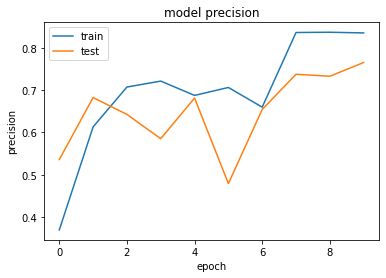

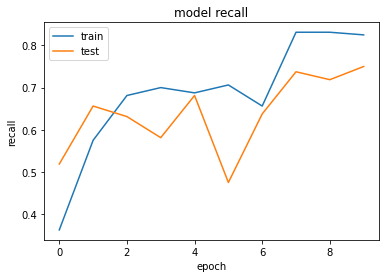

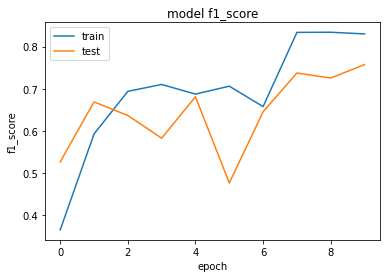

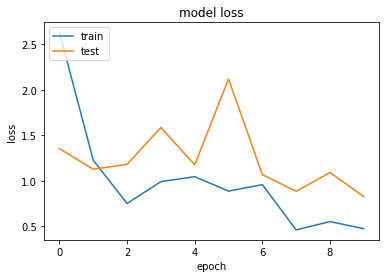

In [ ]:
# Exibindo dados de Precisão
plt.plot(history.history['precision_score'])
plt.plot(history.history['val_precision_score'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Sensibilidade
plt.plot(history.history['recall_score'])
plt.plot(history.history['val_recall_score'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de F1 Score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Pergunta**: Avalie os gráficos de perda (*loss*), precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*)  e explique o comportamento de ambos no que tange a convergência do modelo.

**Resposta**:Para precisão, sensibilidade e pontuação pode-se observar que o modelo convergiu bem até a segunda época, então houve uma certa estabilidade até a época 6 e então houve mais uma curva acendente mostrando que o modelo convergiu bem, quanto a perda o gráfico apresentou uma curva descentende acentuada até a segunda época e continuou a descer depois da sexta época indicando uma boa convergência para perda (quanto menos perda melhor)

**Pergunta**: Quais são os valores de **precisão (precision)**, **sensibilidade (recall)** de validação? 

*Estes valores são exibidos durante o treinamento, utilize a última saída, exemplo:*

```
Epoch 10/10 [==============================] - 45s 9s/step - loss: 0.1234 - precision_score: 0.9742 - recall_score: 0.9683 - f1_score: 0.9712 - val_loss: 0.8819 - val_precision_score: 0.6912 - val_recall_score: 0.5649 - val_f1_score: 0.6216```

No caso acima, o valor de precisão, sensibilidade e pontuação de validação são, respectivamente, 69,12%, 56,49% e 62,16%.

**Resposta**:
Precisão: 76,53% Sensibilidade: 75,00% Pontuação de Validação: 75,75%

## 4.6 Compartivo de arquiteturas

Preencha a tabela abaixo com os valores dos indicadores de performance apresentados.

_O cálculo do F1-Score é dado por 2 * (Precisão * Sensibilidade) / (Precisão + Sensibilidade)._

| Modelo   | Precisão (*Precision*) | Sensibilidade (*Recall*) | F1-Score |
|----------|-------------|------------------|-------------|
| ResNet50 | 80,58 %     | 78,12 %          | 79,33 %     |
| VGG16    | 73,61 %     | 71,88 %          | 72,73 %     |
| VGG19    | 76,53 %     | 75,00 %          | 75,75 %     |


## 4.7 Conclusões

Analise os resultados da tabela de indicadores do comparativo de arquiteturas e explique os principais motivos pelos quais cada modelo obteve cada resultado.

**Resposta**:A arquitetura do ResNet50 apresentou um resultado melhor que o VGG16 e VGG19 para todos os valores, acredito que para as características das imagens que foram utilizada e a análise realizada na classificação dos tipos de pneumonias a quantidade de camadas convolucionais fez bastante diferença na qualidade da predição, isso pode ser observado na diferença entre o VGG16 e VGG19 que possuem a mesma arquitetura mas as três camadas extras do VGG19 foi suficiente para apresentar pontuações melhores. Outro ponto a se observar é que o ResNet50 apresentou um tempo de treino das épocas significativamente menor do que o VGG16 e o VGG19. Isso não significa que o ResNet50 seja "melhor" do que a arquitetura do VGG16~19, mas que para o cenário deste trabalho ele apresentou desempenho superior.

## 4.8 Abordagem adicional (obrigatório)

Considerando os outros classificadores, escolha outro que ainda não foi utilizado, implemente abaixo. Ao final compare os resultados e explique os resultados.

_Não se esquece de utilizar as importações adequadas para cada modelo.
A forma de implementação deve respeitar as mesmas condições como valor de split e quantidade de imagens para poder comparar os modelos._

In [ ]:
#IMPLEMENTE
from tensorflow.keras.applications import inception_v3

conv_base = InceptionV3(include_top=False)

for layer in conv_base.layers:
    layer.trainable = False

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:

x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 

predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:

optimizer = optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

In [ ]:
qtde_epocas = 30
history = model.fit(train_generator, epochs=qtde_epocas, validation_steps=5, steps_per_epoch=5, 
                    validation_data=val_generator)


Epoch 1/30
5/5 [==============================] - 37s 8s/step - loss: 0.9969 - precision_score: 0.8188 - recall_score: 0.8188 - f1_score: 0.8187 - val_loss: 1.8821 - val_precision_score: 0.6380 - val_recall_score: 0.6250 - val_f1_score: 0.6313
Epoch 2/30
5/5 [==============================] - 37s 8s/step - loss: 1.6451 - precision_score: 0.6425 - recall_score: 0.6313 - f1_score: 0.6368 - val_loss: 1.2636 - val_precision_score: 0.7323 - val_recall_score: 0.7188 - val_f1_score: 0.7254
Epoch 3/30
5/5 [==============================] - 37s 8s/step - loss: 1.4648 - precision_score: 0.6575 - recall_score: 0.6500 - f1_score: 0.6537 - val_loss: 1.9748 - val_precision_score: 0.5849 - val_recall_score: 0.5813 - val_f1_score: 0.5830
Epoch 4/30
5/5 [==============================] - 37s 8s/step - loss: 1.5852 - precision_score: 0.6375 - recall_score: 0.6375 - f1_score: 0.6375 - val_loss: 1.3646 - val_precision_score: 0.7165 - val_recall_score: 0.7125 - val_f1_score: 0.7145
Epoch 5/30
5/5 [========

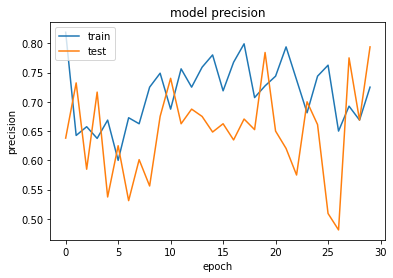

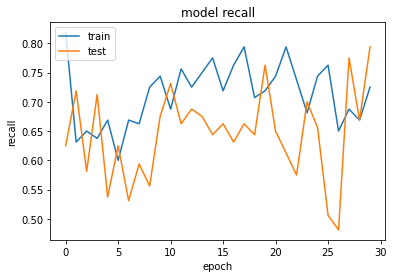

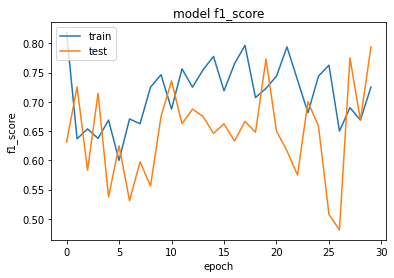

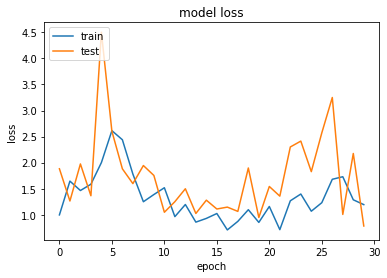

In [ ]:
# Exibindo dados de Precisão
plt.plot(history.history['precision_score'])
plt.plot(history.history['val_precision_score'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Sensibilidade
plt.plot(history.history['recall_score'])
plt.plot(history.history['val_recall_score'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de F1 Score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 4.8.1 Conclusões sobre a abordagem adicional

Como seu modelo performou em comparação com os demais modelos anteriores? Justifique sua resposta levando em consideração a arquitetura respectiva.

**Resposta**:O InceptionV3 não apresentou uma boa convergência, embora tenha alcançado o valor de pontuação mínima de 0.70 o gráfico apresentou uma descendencia até a quinta época e então acendeu um pouco até por volta da décima época e então apresentou muita variação. a perda também não apresentou uma boa conversão pois houve uma acendencia até a quinta época e depois da décima quinta época começou a manter uma padrão de acendencia indicando que o modelo estava ficando cada vez mais impreciso na predição. 
Comparado aos outros modelos o InceptionV3 é até bem rápido no treinamento das épocas mas a precisão e o scoring não são favoráveis para este problema porque apresentaram muita variação e instabilidade, é possível que as imagens utilizadas no nosso datasets precissem de um pré processamento ou de um tratamento antes de aplicar o inceptionV3 para melhorar a performace.